<a href="https://colab.research.google.com/github/SarahEldreny/Natural-Language-Processing-/blob/main/Natural_Language_Processing_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#A Gentle Introduction to Natural Language Processing

An Intro to NLP with Sentiment Analysis on text data.

Humans communicate through some form of language either by text or speech. Now to make interactions between computers and humans, computers need to understand natural languages used by humans. Natural language processing is all about making computers learn, process, and manipulate natural languages.

In this blog, we will look at some of the common practices used in Natural language processing tasks. And build a simple Sentiment Analysis Model on movie reviews to predict whether the given review is positive or negative.

#What is Natural Language Processing(NLP)?

NLP is a branch of artificial intelligence that deals with analyzing, understanding, and generating the languages that humans use naturally in order to interface with computers in both written and spoken contexts using natural human languages instead of computer languages.
Applications of NLP

    Machine translation(Google Translate)
    Natural language generation
    Web Search
    Spam filters
    Sentiment Analysis
    Chatbots
    … and many more

#Data Cleaning:

In the data cleaning process, we remove special characters, symbols, punctuation, HTML tags<>, etc from the raw data which contains no information for the model to learn, these simply noise in our data.

This process also depends on the problem statement, like what to remove from raw text. For example, if the problem contains text from the economics or business world then symbols like $ or other currency symbols may contain some hidden information that we do not want to lose. But in most cases we remove them.

In [1]:
# Data Cleaning
import re

#sample review from the IMDB dataset.
review = "<b>A touching movie!!</b> It is full of emotions and wonderful acting.<br> I could have sat through it a second time."

cleaned_review = re.sub(re.compile('<.*?>'), '', review) #removing HTML tags
cleaned_review = re.sub('[^A-Za-z0-9]+', ' ', cleaned_review) #taking only words

print(cleaned_review)

A touching movie It is full of emotions and wonderful acting I could have sat through it a second time 


#Preprocessing of data:

    Preprocessing of data is a data mining technique that involves transforming the raw data into an understandable format.

## Lowercase:

Making all the text lower case is one of the simplest and most effective forms of text preprocessing.

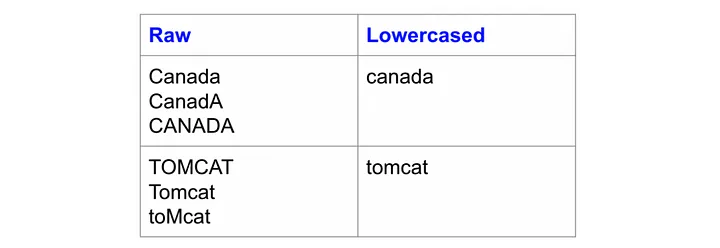

In [2]:
# Lowercase

cleaned_review = cleaned_review.lower()

print(cleaned_review)

a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 


#Tokenization:

Tokenization is the process of breaking up text document into individual words called tokens.

In [3]:
# Tokenization
import nltk
nltk.download('punkt')

from nltk.tokenize import word_tokenize

tokens = nltk.word_tokenize(cleaned_review)

print(cleaned_review)
print(tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


a touching movie it is full of emotions and wonderful acting i could have sat through it a second time 
['a', 'touching', 'movie', 'it', 'is', 'full', 'of', 'emotions', 'and', 'wonderful', 'acting', 'i', 'could', 'have', 'sat', 'through', 'it', 'a', 'second', 'time']


As seen above sentence is broken down into words(tokens). Natural language toolkit(NLTK) is a popular open source library used extensively for NLP tasks. For this blog, we will use nltk for all the text preprocessing steps.

    You can download nltk library using pip:

In [4]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Stop words removal:

Stop words are common words that do not contribute much of the information in a text document. Words like ‘the’, ‘is’, ‘a’ have less value and add noise to the text data.

There is an in-built stopword list in NLTK which we can use to remove stop words from text documents. However this is not the standard stopwords list for every problem, we can also define our own set of stopwords based on the domain.

In [5]:
# Stop words removal

nltk.download('stopwords') # you have to download the set of stop words the first time
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

filtered_review = [word for word in tokens if word not in stop_words] # removing stop words

print(filtered_review)

['touching', 'movie', 'full', 'emotions', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NLTK has a predefined list of stop words. We can add or remove stopwords from this list or use them as it is based on the specific task.

#Stemming:

Stemming is the process of reducing a word to its stem/root word. It reduces inflection in words (e.g. ‘help’, ’helping’, ’helped’, ’helpful’) to their root form (e.g. ‘help’). It removes the morphological affixes from words, leaving only the word stem.

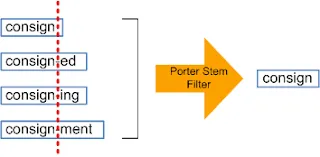

In [ ]:
# Stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

stemmed_review = [stemmer.stem(word) for word in filtered_review]
# for word in filtered_review:
#   stemmer.stem(word)
  
print(stemmed_review)

['touch', 'movi', 'full', 'emot', 'wonder', 'act', 'could', 'sat', 'second', 'time']


The stem word may or may not be a valid word in the language. For example ‘movi’ is the root word for ‘movie’, and ‘emot’ is the root word for ‘emotion’.

#Lemmatization:

Lemmatization does the same thing as stemming, converting a word to its root form but with one difference i.e., the root word, in this case, belongs to a valid word in the language. For example, the word caring would map to ‘care’ and not ‘car’ in case of stemming.

In [7]:
# Lemmatization
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

lemm_review = [lemmatizer.lemmatize(word) for word in filtered_review]

print(lemm_review)

['touching', 'movie', 'full', 'emotion', 'wonderful', 'acting', 'could', 'sat', 'second', 'time']


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


WordNet is a database of valid words in the English language. NLTK’s WordNetLemmatizer() uses valid words from WordNet.

# **N-grams:**

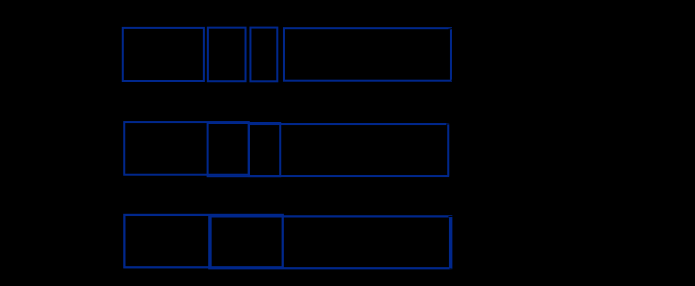

N-grams are the combination of multiple words used together, Ngrams with N=1 is called unigrams. Similarly, bigrams (N=2), trigrams (N=3), and so on can also be used.

N-grams can be used when we want to preserve sequence information in the document, like what word is likely to follow the given one. Unigrams don’t contain any sequence information because each word is taken individually.

#Text Data Vectorization:

    The process of converting text into numbers is called text data vectorization. Now after text preprocessing, we need to numerically represent text data i.e., encoding the data in numbers which can be further used by algorithms.

#Bag of words(BOW):

It is one of the simplest text vectorization techniques. The intuition behind BOW is that two sentences are said to be similar if they contain a similar set of words.

Consider these two sentences:

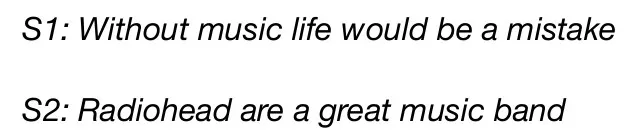

    In NLP tasks, each text sentence is called a document and collection of such documents is referred to as text corpus.

BOW constructs a dictionary of d unique words in the corpus(collection of all the tokens in data). For example corpus in the above image is made up of combined words in S1 and S2.

Now, we can think of like creating a table where columns are all the set of unique words in the corpus with each row corresponding to a sentence(document). We set the value as 1 if the word is present in the sentence else we set it to 0.

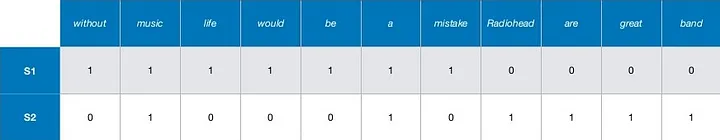

This will create a matrix of dxn where d is the total number of unique tokens in the corpus and n equals the number of documents. In the above example, the matrix will be of shape 11x2.

#TF-IDF:

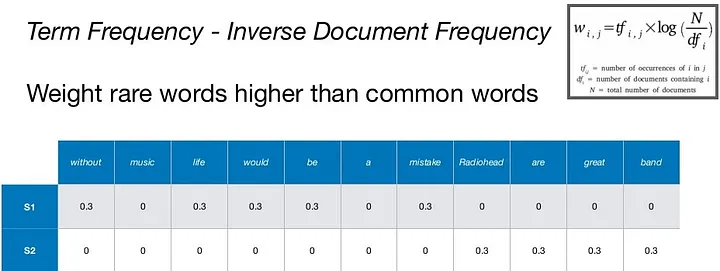

It stands for Term Frequency(TF)-Inverse Document Frequency.

#Term Frequency:

Term Frequency defines the probability of finding a word in the document. Now let’s say we want to find what is the probability of finding a word wi in document dj.

    Term Frequency(wi, dj) =

    Number of times wi occurs in dj/Total number of words in dj

#Inverse Document Frequency:

The intuition behind IDF is that a word is not of much use if it is appearing in all the documents. It defines how unique is the word in the total corpus.

    IDF(wi, Dc) = log(N/ni)

Here, Dc = All documents in the corpus,

N = Total number of documents,

ni = documents which contain word (wi).

    If wi is more frequent in the corpus then IDF value decreases.

    If wi is not frequent which means ni decreases and hence IDF value increases.

    TF(wi, dj) * IDF(wi, Dc)

TF-IDF is the multiplication of TF and IDF values. It gives more weightage to words that occurs more in the document and less in the corpus.

#Sentiment Analysis: IMDB Movie Reviews

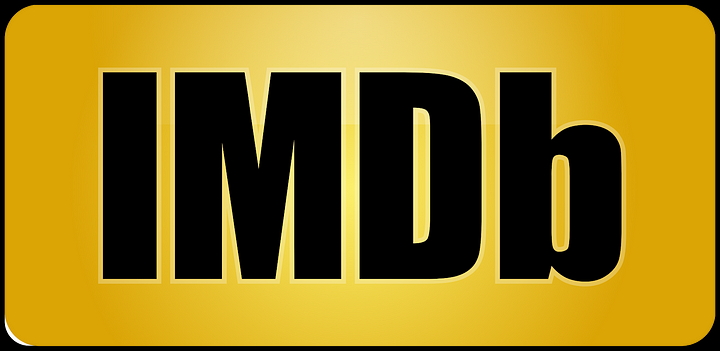

#About

The dataset contains a collection of 50,000 reviews from the IMDB Website with an equal number of positive and negative reviews. The task is to predict the polarity (positive or negative) of a given review(text).

I used Deepnote to do the data analysis on IMDB dataset, its easy and fast to setup plus provides great collaboration tools. What I most like is the ability to plug and play from multiple data sources. If you are new and starting your data science journey I highly recommend to check it out.

# 1. Loading and exploration of Data

IMDB Dataset can be downloaded from here.

Dataset overview:

In [8]:
# get IMDB Dataset: http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!wget http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz

--2023-03-16 19:24:23--  http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
Resolving ai.stanford.edu (ai.stanford.edu)... 171.64.68.10
Connecting to ai.stanford.edu (ai.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84125825 (80M) [application/x-gzip]
Saving to: ‘aclImdb_v1.tar.gz’

aclImdb_v1.tar.gz   100%[===================>]  80.23M  44.4MB/s    in 1.8s    

2023-03-16 19:24:25 (44.4 MB/s) - ‘aclImdb_v1.tar.gz’ saved [84125825/84125825]



In [9]:
# extract downloaded files
!tar xvzf aclImdb_v1.tar.gz

Streaming output truncated to the last 5000 lines.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/train/unsup/4

In [11]:
# After extraction, folder aclImdb contains two folders as follows:
#  * train
#     * pos reviews
#     * neg reviews 
#  * test
#     * pos reviews
#     * neg reviews

# Let's, load movie reviews in pandas dataframe and add corresponding label.
# https://stackoverflow.com/questions/33912773/python-read-txt-files-into-a-dataframe/33912971
import os

def fetch_reviews(path):
  data = []
  #path = 'aclImdb/train/pos/'
  files = [f for f in os.listdir(path)]
  for file in files:
    with open(path+file, "r", encoding='utf8') as f:
      data.append(f.read())
      
  return data

In [12]:
import pandas as pd
import matplotlib.pyplot as plt


df_train_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/train/pos/'), 'label': 1})
df_train_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/train/neg/'), 'label': 0})

df_test_pos = pd.DataFrame({'review': fetch_reviews('aclImdb/test/pos/'), 'label': 1})
df_test_neg = pd.DataFrame({'review': fetch_reviews('aclImdb/test/neg/'), 'label': 0})

# Merging all df's for data cleaning and preprocessing step.
df = pd.concat([df_train_pos, df_train_neg, df_test_pos, df_test_neg], ignore_index=True)
print("Total reviews in df: ", df.shape)
df.head()

Total reviews in df:  (50000, 2)


,review,label
0,This movie has one of the cheesiest plots I ha...,1
1,I first came across this film when I read a bo...,1
2,In this movie the year 2022 looks much like th...,1
3,Does anyone happen to know where this film was...,1
4,I commend pictures that try something differen...,1


#EDA

In [14]:
# No null values in dataset.
print(df['review'].isnull().sum())
print("Total Number of positive reviews in data: ", df[df['label']==1].shape[0])
print("Total Number of negative reviews in data: ", df[df['label']==0].shape[0])

0
Total Number of positive reviews in data:  25000
Total Number of negative reviews in data:  25000


Positive reviews are labeled as 1 and negative as 0.


### Sample positive review:

In [15]:
# sample positive movie review
df[df['label']==1].sample(n=1)['review'].iloc[0]

"Though not in the whole film, Andy Griffith again plays his role best in this CBS tv-movie. The plot is easy-Griffith's character dies and his last wish is that his wife and kids scatter his ashes is the place he named (Mountains Somewhere). Though it will never be seen on TV and never be released on video, if you do get the chance to watch this--TAKE IT."

### Sample negative review:

In [16]:
# sample negative review
df[df['label']==0].sample(n=1)['review'].iloc[0]

'The Dune miniseries opens with a "flashforward" montage of action sequences. The realisation quickly dawns that these are the *best* scenes out of the 265 minute running time, and they\'re not good. Not good at all. Oh dear. <br /><br />But let us not judge a book by its cover (even though that\'s exactly what we\'re being invited to do). Let\'s give Dune a chance to redeem itself.<br /><br />Well, here\'s the expected watery opening on Caladan. But who\'s this petulant, strangely ugly man? Paul Atreides? *This* is Paul Atreides? This generic plastic puppet? And why does he look so old? What\'s that? The actor\'s only 25? Well, he doesn\'t *look* it, and that\'s way too old anyway.<br /><br />But at least he has charisma, right? Wrong. Alec Newman is a stumbling, mumbling buffoon. I\'m picturing him being discovered sitting in the dark in a remedial acting class because nobody liked him enough to tell him the class was over, and he\'s just too dumb to realise it. When your Paul Atreid

In [17]:
# word_count in reviews
word_counts = df['review'].apply(lambda x: len(x.split()))

word_counts.describe()

count    50000.000000
mean       231.156940
std        171.343997
min          4.000000
25%        126.000000
50%        173.000000
75%        280.000000
max       2470.000000
Name: review, dtype: float64

In [21]:
# plt.boxplot(df['word_counts'].values)
# plt.grid(True)
# plt.show()
# # Observations: Most of the reviews have words 200-350.

#2. Data preprocessing

In [22]:
import re
# import nltk
# nltk.download('punkt') # At first you have to download these nltk packages.
# nltk.download('stopwords')
# nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

stop_words = stopwords.words('english') # defining stop_words
stop_words.remove('not') # removing not from the stop_words list as it contains value in negative movies
lemmatizer = WordNetLemmatizer()

def data_preprocessing(review):
    
  # data cleaning
  review = re.sub(re.compile('<.*?>'), '', review) #removing html tags
  review =  re.sub('[^A-Za-z0-9]+', ' ', review) #taking only words
  
  # lowercase
  review = review.lower()
  
  # tokenization
  tokens = nltk.word_tokenize(review) # converts review to tokens
  
  # stop_words removal
  review = [word for word in tokens if word not in stop_words] #removing stop words
  
  # lemmatization
  review = [lemmatizer.lemmatize(word) for word in review]
  
  # join words in preprocessed review
  review = ' '.join(review)
  
  return review

In [25]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'only', 'own', 'same', 'so', 'than', 'too', '

Here we are doing all the steps of data cleaning and preprocessing in one method as discussed above. We are using lemmatization and not stemming because while testing results with both, lemmatization gives slightly better results compared to stemming.

Usage of stemming or lemmatization or both depends on the problem, so we should try and see which way works best for the given task.

In [26]:
df['preprocessed_review'] = df['review'].apply(lambda review: data_preprocessing(review))
df.head()

,review,label,preprocessed_review
0,This movie has one of the cheesiest plots I ha...,1,movie one cheesiest plot seen make awesome fre...
1,I first came across this film when I read a bo...,1,first came across film read book written 1970s...
2,In this movie the year 2022 looks much like th...,1,movie year 2022 look much like seventy amusing...
3,Does anyone happen to know where this film was...,1,anyone happen know film shot aviation scene cl...
4,I commend pictures that try something differen...,1,commend picture try something different many f...


Adding a new column preprocessed_review in the dataframe by applying data_preprocessing() on all the reviews.

#Positive Reviews Wordcloud

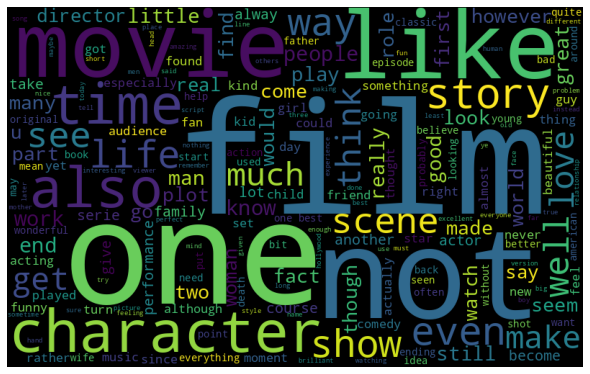

In [27]:
from wordcloud import WordCloud

words_list = df[df['label']==1]['preprocessed_review'].unique().tolist()
pos_words = " ".join(words_list)

pos_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(pos_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(pos_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

#Negative Reviews Wordcloud

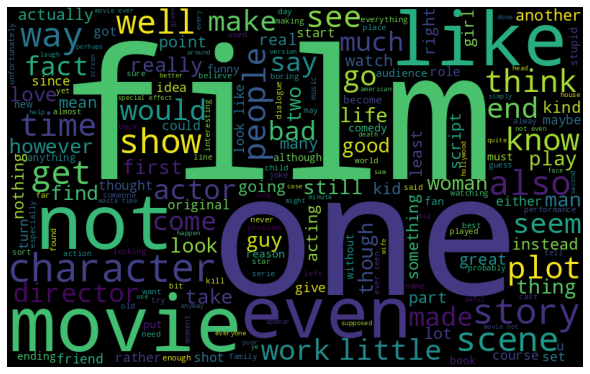

In [28]:
words_list = df[df['label']==0]['preprocessed_review'].unique().tolist()
neg_words = " ".join(words_list)

neg_wordcloud =  WordCloud(
                  width=800, height = 500,            
                  stopwords=stop_words).generate(neg_words)

plt.figure(figsize=(8, 8), facecolor = None)
plt.imshow(neg_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()



#Splitting the data set into train and test(70–30):

In [29]:
from sklearn.model_selection import train_test_split

data = df.copy()
y = data['label'].values
data.drop(['label'], axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, stratify=y)

print("Train data:",  X_train.shape, y_train.shape)
print("Test data:",  X_test.shape, y_test.shape)

Train data: (35000, 2) (35000,)
Test data: (15000, 2) (15000,)


We are using sklearn’s train_test_split to split data into train and test. Here we are using parameter stratify, to have an equal proportion of classes in train and test.
#3. Vectorizing Text(reviews)

#BOW

In [30]:
from sklearn.feature_extraction.text import CountVectorizer

vect = CountVectorizer(min_df=10)

X_train_review_bow = vect.fit_transform(X_train['preprocessed_review'])
X_test_review_bow = vect.transform(X_test['preprocessed_review'])

print('X_train_review_bow shape: ', X_train_review_bow.shape)
print('X_test_review_bow shape: ', X_test_review_bow.shape)

X_train_review_bow shape:  (35000, 19519)
X_test_review_bow shape:  (15000, 19519)


Here we have used min_df=10 as we only want those words which occur at least 10 times in the whole corpus.

#TF-IDF

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=10)

X_train_review_tfidf = vectorizer.fit_transform(X_train['preprocessed_review'])
X_test_review_tfidf = vectorizer.transform(X_test['preprocessed_review'])

print('X_train_review_tfidf shape: ', X_train_review_tfidf.shape)
print('X_test_review_tfidf shape: ', X_test_review_tfidf.shape)

X_train_review_tfidf shape:  (35000, 19519)
X_test_review_tfidf shape:  (15000, 19519)


# 4. Building ML Classifiers

### Naive Bayes with reviews BOW encoded

In [42]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.8500666666666666


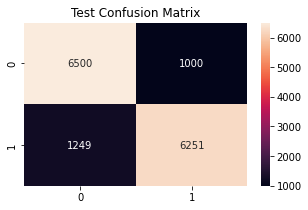

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

Naive Bayes with BOW gives an accuracy of 84.6%. Let’s try with TF-IDF.

#Naive Bayes: TFIDF

In [44]:
clf = MultinomialNB(alpha=1)
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8575333333333334


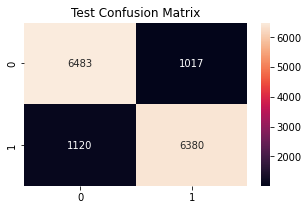

In [45]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

# Logistic Regression: BOW

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_bow, y_train)

y_pred = clf.predict(X_test_review_bow) #prediction from model
print('Test Accuracy: ', accuracy_score(y_test, y_pred)) 

Test Accuracy:  0.88


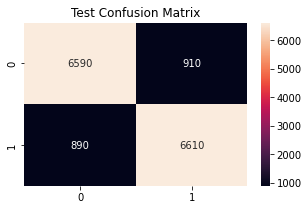

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

# Logistic Regression: TFIDF

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2')
clf.fit(X_train_review_tfidf, y_train)

y_pred = clf.predict(X_test_review_tfidf)
print('Test Accuracy: ', accuracy_score(y_test, y_pred))

Test Accuracy:  0.8942666666666667


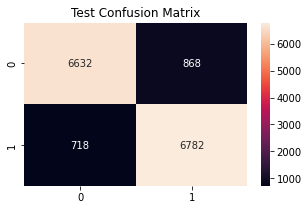

In [39]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Test Confusion Matrix')
plt.show()

Plotting the confusion matrix gives us information about how many of the data points are correctly and incorrectly classified by the model.

Out of 7500 negative reviews, 6515 were correctly classified as negative and 985 were incorrectly classified as positive. Out of 7500 positive reviews, 6696 were correctly classified as positive and 804 were incorrectly classified as negative.

#Conclusion



In [48]:
from prettytable import PrettyTable

x = PrettyTable()

x.field_names = ['Vectorizer', 'Model', 'Accuracy']
x.add_row(['BOW', 'Naive Bayes', '84.6%'])
x.add_row(['TFIDF', 'Naive Bayes', '85.3%'])
x.add_row(['BOW', 'Logistic Regression', '88%'])
x.add_row(['TFIDF', 'Logistic Regression', '88.0%'])
print(x)

+------------+---------------------+----------+
| Vectorizer |        Model        | Accuracy |
+------------+---------------------+----------+
|    BOW     |     Naive Bayes     |  84.6%   |
|   TFIDF    |     Naive Bayes     |  85.3%   |
|    BOW     | Logistic Regression |   88%    |
|   TFIDF    | Logistic Regression |  88.0%   |
+------------+---------------------+----------+


#Summary

We have learned some basic NLP tasks and built simple ML Models for sentiment analysis of movie reviews. Further improvements can be achieved by trying word embedding with deep learning models.